### Machine Learning with Big Data
## Part 2: Convolutional Neural Networks

# 0.8 - CNN Evaluation

**Group:** MLBD_Deventer 4   
**Students:** Mathijs Pattipeilohy (512391), Emin Fikret (511275)

In [11]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from joblib import load

In [2]:
ARTIFACTS_DIR = "../artifacts"

In [3]:
(
    _X_train, _X_val, X_test,
    _y_train, _y_val, y_test,
    classes
) = load(os.path.join(ARTIFACTS_DIR, "images_tuple.joblib"))

In [4]:
model_files = [
    f for f in os.listdir(ARTIFACTS_DIR)
    if f.startswith("best_cnn_") and f.endswith(".keras")
]

results = []
for file in sorted(model_files):
    path = os.path.join(ARTIFACTS_DIR, file)
    print(f"Evaluating {file} ...")
    model = tf.keras.models.load_model(path)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    results.append((file.replace(".keras", ""), acc, loss))

Evaluating best_cnn_baseline_v1.keras ...
Evaluating best_cnn_baseline_v2.keras ...
Evaluating best_cnn_baseline_v3.keras ...
Evaluating best_cnn_data_augmentation.keras ...
Evaluating best_cnn_dropout.keras ...
Evaluating best_cnn_early_stopping.keras ...
Evaluating best_cnn_pooling.keras ...


In [5]:
df = pd.DataFrame(results, columns=["Model", "Test Accuracy", "Test Loss"])
df = df.sort_values("Test Accuracy", ascending=False).reset_index(drop=True)
df

,Model,Test Accuracy,Test Loss
0,best_cnn_data_augmentation,0.929688,0.277452
1,best_cnn_pooling,0.906250,0.303644
2,best_cnn_dropout,0.898438,0.343100
3,best_cnn_baseline_v3,0.890625,0.532256
4,best_cnn_baseline_v2,0.875000,0.447380
5,best_cnn_early_stopping,0.875000,0.485931
6,best_cnn_baseline_v1,0.843750,0.439494


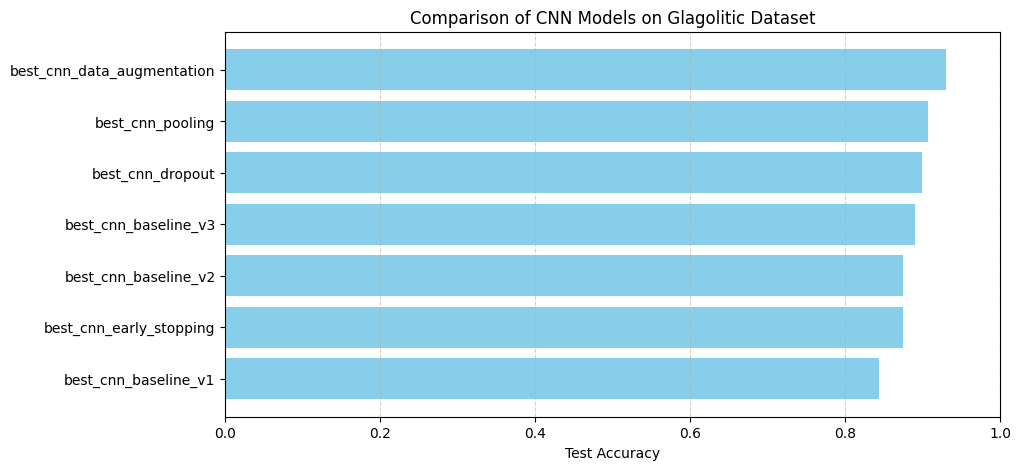

In [8]:
plt.figure(figsize=(10,5))

plt.barh(df["Model"], df["Test Accuracy"], color="skyblue")
plt.xlabel("Test Accuracy")
plt.title("Comparison of CNN Models on Glagolitic Dataset")
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()

In [9]:
best_model_name = df.loc[0, "Model"]
best_model_path = os.path.join(ARTIFACTS_DIR, f"{best_model_name}.keras")

print(f"Best model: {best_model_name}")
model = tf.keras.models.load_model(best_model_path)

Best model: best_cnn_data_augmentation


In [22]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Reloaded model accuracy: {acc:.4f}")

Reloaded model accuracy: 0.9297


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


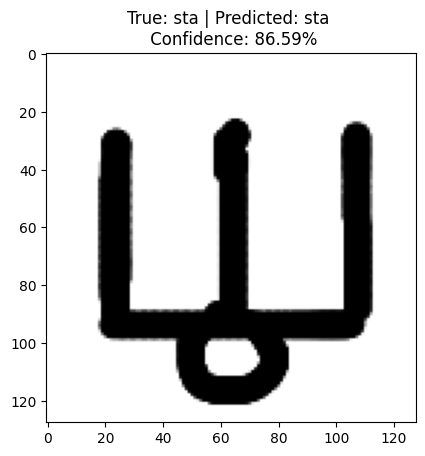

In [36]:
idx = np.random.randint(0, len(X_test))
sample = X_test[idx:idx+1]

pred = model.predict(sample)
pred_label = classes[np.argmax(pred)]
true_label = classes[np.argmax(y_test[idx])]
confidence = np.max(pred) * 100

plt.imshow(X_test[idx] / 255.0)
plt.title(f"True: {true_label} | Predicted: {pred_label} \n Confidence: {confidence:.2f}%")
plt.show()

### Conclusion

Through our experiments, we learned that the best model is not always the one with the highest accuracy, but the one that balances accuracy, overfitting and underfitting, training speed, and model size.

By testing different techniques such as dropout, early stopping, pooling, and data augmentation, we aimed to find this balance.

Even if the augmented model did not achieve the absolute best accuracy, it offered better generalization, stability, and efficiency, which are equally important for building a strong and reliable CNN.

In the end, this project showed that creating a good deep learning model is not just about pushing accuracy higher, but about achieving a balanced, well-performing network that works consistently across different data conditions.

### References:
- https://www.geeksforgeeks.org/deep-learning/training-and-validation-loss-in-deep-learning/